In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cardetails.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,NaN,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.isnull().sum()

name                0
year                0
selling_price       0
km_driven         813
fuel                0
seller_type         0
transmission        0
owner               0
mileage          1011
engine           1008
max_power         215
torque            222
seats             221
dtype: int64

In [5]:
if 'engine' in df.columns:
    df['engine'] = df['engine'].str.replace('CC', '', regex=False).str.strip()
    df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
if 'max_power' in df.columns:
    df['max_power'] = df['max_power'].str.replace('bhp', '', regex=False).str.strip()
    df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
if 'milage' in df.columns:
    df['mileage'] = df['mileage'].str.replace('Kmpl', '', regex=False).str.strip()
    df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

In [6]:
y = df['selling_price']
X=df.drop(['name','torque','selling_price'], axis=1)

In [7]:
print(X)

      year  km_driven    fuel seller_type transmission                 owner  \
0     2014   145500.0  Diesel  Individual       Manual           First Owner   
1     2014   120000.0  Diesel  Individual       Manual          Second Owner   
2     2006   140000.0  Petrol  Individual       Manual           Third Owner   
3     2010   127000.0  Diesel  Individual       Manual           First Owner   
4     2007   120000.0  Petrol  Individual       Manual           First Owner   
...    ...        ...     ...         ...          ...                   ...   
8123  2013   110000.0  Petrol  Individual       Manual           First Owner   
8124  2007   119000.0  Diesel  Individual       Manual  Fourth & Above Owner   
8125  2009   120000.0  Diesel  Individual       Manual           First Owner   
8126  2013    25000.0  Diesel  Individual       Manual           First Owner   
8127  2013    25000.0  Diesel  Individual       Manual           First Owner   

         mileage  engine  max_power  se

In [8]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [9]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [13]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_preprocessed.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  
])

C:\Users\OM DHAMAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

In [15]:
history = model.fit(
    X_train_preprocessed, y_train,
    validation_data=(X_test_preprocessed, y_test),
    epochs=40,
    batch_size=32,
    verbose=1
)

Epoch 1/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1036081627136.0000 - mae: 633339.8125 - val_loss: 1041373790208.0000 - val_mae: 624950.3750
Epoch 2/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1032187150336.0000 - mae: 598148.9375 - val_loss: 736705511424.0000 - val_mae: 417098.8125
Epoch 3/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 605499686912.0000 - mae: 341548.5000 - val_loss: 385434877952.0000 - val_mae: 273550.2812
Epoch 4/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 351479136256.0000 - mae: 278371.5000 - val_loss: 279507009536.0000 - val_mae: 266898.4062
Epoch 5/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 276080492544.0000 - mae: 263599.5000 - val_loss: 224619937792.0000 - val_mae: 254366.1562
Epoch 6/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 214035890176.0000 - mae: 254555.8438 - val_loss: 192690716672.0000 - val_mae: 251076.2656
Epoch 7/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 186718617600.0000 - mae: 247635.9844 

In [16]:
test_loss, test_mae = model.evaluate(X_test_preprocessed, y_test, verbose=0)
print(f"\nTest MAE: ${test_mae:.2f}")
print(f"Approximate Average Error: {test_mae/y_test.mean():.2%}")


Test MAE: $93343.77
Approximate Average Error: 14.66%


In [17]:
sample_prediction = model.predict(X_test_preprocessed[:1])
print(f"\nSample prediction: ${sample_prediction[0][0]:.2f}")
print(f"Actual value: ${y_test.iloc[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

Sample prediction: $221085.53
Actual value: $198000.00


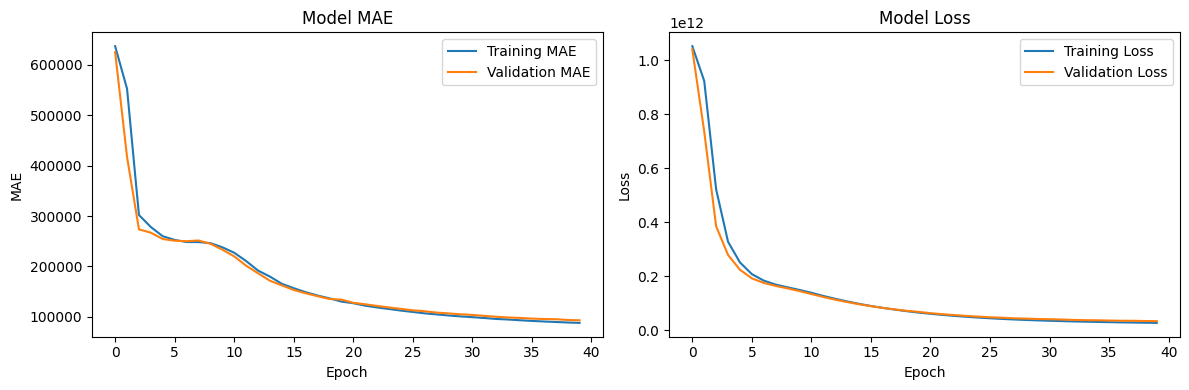

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()